In [1]:
# from transformers import pipeline

In [2]:
# from tokenizers import Tokenizer
# from tokenizers.models import BPE
# from tokenizers.trainers import BpeTrainer
# from tokenizers.pre_tokenizers import Whitespace

In [3]:
# tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
# trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])


# files = ['../../data/simple.txt']

In [4]:
# tokenizer.train(files, trainer)

In [5]:
# tokenizer.save("tokenizer.json")

In [6]:
# unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')

In [7]:
# unmasker("यसको प्रभाव विगत [MASK] वर्षहरुमा  पनि देखा पर्‍यो।")

In [8]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")
# text = "Replace me by any text you'd like."
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
# sentence_embedding = 

# model

In [10]:
# sequence = "Using a Transformer network is simple"

# tokenizer.tokenize(sequence)

In [11]:
# token_ids = tokenizer(sequence)

In [12]:
# ids = token_ids['input_ids']

In [13]:
import torch
from transformers import AutoModelForSequenceClassification,AutoModel
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")
# input_ids = torch.tensor([ids])

# output = model(input_ids)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [14]:
# output['last_hidden_state'].shape

In [15]:
# output

In [16]:
# output['pooler_output'].shape

In [17]:
from torch import nn


class BertPreTrainedSentiment(nn.Module):
    
    def __init__(self,hid1,hid2,hid3):
        super().__init__()
        
        self.checkpoint = 'bert-base-multilingual-cased'
        self.pretrainedBert = AutoModel.from_pretrained("bert-base-multilingual-cased")
        
        self.linear1 = nn.Linear(768,hid1)
        self.linear2 = nn.Linear(hid1,hid2)
        self.linear3 = nn.Linear(hid2,hid3)
        self.linear4 = nn.Linear(hid3,3)
        self.dropout = nn.Dropout(0.1)
        self.act = nn.ReLU()
        
        
    def forward(self,X):
        y_temp = self.pretrainedBert(X)
        y_temp = self.act(self.linear2(self.dropout(self.act(self.linear1(y_temp['pooler_output'])))))
        y_temp = self.dropout(self.linear3(y_temp))
        y = self.linear4(self.act(y_temp))
        
        
        return y
        
    

In [18]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')



# nepali_seq = 'यसको प्रभाव विगत दुई वर्षहरुमा पनि देखा पर्‍यो।'
# ids = tokenizer(nepali_seq)['input_ids']

# input_ids = torch.tensor([ids])

In [19]:
# input_ids

In [20]:
# m = BertPreTrainedSentiment(200,800)

In [21]:
# output = m(input_ids)

In [22]:
# output

In [23]:
# sm = nn.Softmax(dim=1)

In [24]:
# p_output = sm(torch.tensor([[5.,3.,1.]]))

In [25]:
# p_output

In [26]:
import numpy as np
%pip install pandas
%pip install nltk


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('all_sentimental_data.csv')

In [29]:
data.sample(3)

,text,label
8286,देसकै महान र विद्वान ब्यक्ति माहानयक रजेश हमल...,1
8537,कुरा समान्ता को हो,2
8468,दया दाईको कार्यक्रम प्रस्तुत गर्ने शैली मन पर्...,1


In [30]:
data.head()

,text,label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
3,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
4,साँच्चिकै सुहाउछ,1


In [31]:
data[data.isnull().any(axis=1)]

,text,label
6055,NaN,0
9149,NaN,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10171 entries, 0 to 10170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10169 non-null  object
 1   label   10171 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.0+ KB


In [33]:
data.dropna(axis = 0, inplace = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10169 non-null  object
 1   label   10169 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 238.3+ KB


In [35]:
data.label.value_counts()

1    3965
0    3702
2    2502
Name: label, dtype: int64

# Text Preprocessing

In [36]:
# %pip install nepalitokenizer
# %pip install nepali-stemmer
# %pip install importlib_resources

In [37]:
# from nepali_stemmer.stemmer import NepStemmer
# from nepalitokenizer import NepaliTokenizer
# nepstem = NepStemmer()
# tokenize = NepaliTokenizer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_preprocessing(text, nepali_stopwords = stopwords.words('nepali')):
    # Tokenize the reviews
    text = text.split()
    # Remove the nepali stopwords
    text = [word for word in text if word not in nepali_stopwords]
    text = ' '.join(text)
    # Stemming the nepali words
#     text = nepstem.stem(text)
    # Remove the leading and trailing spaces
#     text = text.split()
#     text = ' '.join(text)  
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
X = data["text"].apply(text_preprocessing)
y = data["label"]

In [39]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

Note: you may need to restart the kernel to use updated packages.


In [40]:
print(f"Train size =  {len(X_train)}")
print(f"Test size =  {len(X_test)}")


Train size =  8135
Test size =  2034


In [41]:
# t = tokenizer(list(X_train),padding = 'max_length',max_length = 32,truncation=True)

In [42]:
max_length = 64

batch_size = 32
rem = len(X_train)%batch_size
t = tokenizer(list(X_train),padding = 'max_length',max_length =max_length,truncation=True)
torch.cuda.memory_allocated()

0

In [43]:
ids = t['input_ids']
device = 'cuda' if torch.cuda.is_available() else 'cpu'



input_ids = torch.tensor(ids)[:-rem,:]
print(input_ids.shape)
batched_ids = input_ids.reshape(-1,batch_size,max_length)


batched_ids.shape

torch.Size([8128, 64])


torch.Size([254, 32, 64])

In [44]:
targets = torch.tensor(list(y_train))[:-rem]
targets = targets.reshape(-1,batch_size)

In [45]:
model = BertPreTrainedSentiment(480,180,60).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [46]:
criterion = nn.CrossEntropyLoss()
lr = 0.05  # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

In [47]:
def train(model: nn.Module) -> None:
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 50
    start_time = time.time()
#     src_mask = generate_square_subsequent_mask(bptt).to(device)
    for i in range(0, batched_ids.size(0)):
        data = batched_ids[i]
        targets_ = targets[i]
#         batch_size = data.size(0)
#         if batch_size != bptt:  # only on last batch
#             src_mask = src_mask[:batch_size, :batch_size]
        output = model(data.to(device))
        loss = criterion(output.view(-1, 3), targets_.to(device))

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if i % log_interval == 0 and i > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            print(f'| epoch {epoch:3d} | {i:5d}/{batched_ids.size(0):5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} |')
            total_loss = 0
            start_time = time.time()
    

In [48]:
batched_ids[0].shape

torch.Size([32, 64])

In [49]:
sm = nn.Softmax(dim=1)

In [70]:
# import copy
import time
epochs = 10
for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model)
    



| epoch   1 |    50/  254 batches | lr 0.05 | ms/batch 486.77 | loss  0.68 |
| epoch   1 |   100/  254 batches | lr 0.05 | ms/batch 462.39 | loss  0.68 |
| epoch   1 |   150/  254 batches | lr 0.05 | ms/batch 464.28 | loss  0.66 |
| epoch   1 |   200/  254 batches | lr 0.05 | ms/batch 465.73 | loss  0.67 |
| epoch   1 |   250/  254 batches | lr 0.05 | ms/batch 467.06 | loss  0.64 |
| epoch   2 |    50/  254 batches | lr 0.05 | ms/batch 477.93 | loss  0.66 |
| epoch   2 |   100/  254 batches | lr 0.05 | ms/batch 469.50 | loss  0.66 |
| epoch   2 |   150/  254 batches | lr 0.05 | ms/batch 469.33 | loss  0.61 |
| epoch   2 |   200/  254 batches | lr 0.05 | ms/batch 469.09 | loss  0.65 |
| epoch   2 |   250/  254 batches | lr 0.05 | ms/batch 469.48 | loss  0.63 |
| epoch   3 |    50/  254 batches | lr 0.05 | ms/batch 478.96 | loss  0.65 |
| epoch   3 |   100/  254 batches | lr 0.05 | ms/batch 469.64 | loss  0.64 |
| epoch   3 |   150/  254 batches | lr 0.05 | ms/batch 469.98 | loss  0.60 |

In [71]:
nepali_seq = 'यसको प्रभाव विगत दुई वर्षहरुमा पनि देखा पर्‍यो।'
ids = tokenizer(nepali_seq,padding = 'max_length',max_length=64,truncation = True)['input_ids']

input_ids = torch.tensor([ids])

In [72]:
torch.save(model.state_dict(),'sentiment_withdropoutplus_64maxlengthplus10.pt')

In [73]:
model.eval()


o = model(input_ids.to(device))

In [74]:
y = sm(o)

In [75]:
y

tensor([[0.1164, 0.0693, 0.8143]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [76]:
def batched_indices(X,y):
    rem = len(X)%batch_size
    
    t = tokenizer(X,padding = 'max_length',max_length =max_length,truncation=True)
    ids = t['input_ids']

    input_ids = torch.tensor(ids)[:-rem,:]
    batched_ids = input_ids.reshape(-1,batch_size,max_length)
    targets = torch.tensor(y)[:-rem]
    targets = targets.reshape(-1,batch_size)
    
    return batched_ids,targets

In [77]:
b,t = batched_indices(list(X_test),list(y_test))

In [78]:
i = 8

In [79]:
y = sm(model(b[i].to(device))).argmax(-1)

In [80]:
y

tensor([0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0], device='cuda:0')

In [81]:
sum(t[i].to(device) == y)

tensor(27, device='cuda:0')

In [82]:
t[i]

tensor([0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0])

In [83]:
#True Positive
sum(t[i].to(device) == y)/32

tensor(0.8438, device='cuda:0')

In [84]:
b[0]

tensor([[   101,  32629, 111200,  ...,  35133,  11554,    102],
        [   101,    889,  11453,  ...,      0,      0,      0],
        [   101,  26876,    887,  ...,      0,      0,      0],
        ...,
        [   101,  26876,  12512,  ...,    886,  53195,    102],
        [   101,    889,  14070,  ...,    898,  66943,    102],
        [   101,    871,  12878,  ...,      0,      0,      0]])

In [85]:
true_positive = 0
y_all = None
for i in range(len(b)):
    y = sm(model(b[i].to(device))).argmax(-1)
    if (y_all == None):
        y_all = y
    else:
        y_all = torch.cat((y_all,y))
    true_positive += (sum(t[i].to(device) == y)/32)
avg_true_positive = true_positive/len(b)

print(avg_true_positive)

tensor(0.6478, device='cuda:0')


In [86]:
y_all[:64],sm(model(b[1].to(device))).argmax(-1),t.reshape(-1)[:64]

(tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1,
         0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2,
         0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2], device='cuda:0'),
 tensor([1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1,
         1, 2, 1, 2, 2, 0, 0, 2], device='cuda:0'),
 tensor([0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1,
         2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
         0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2]))

In [87]:
#0.62..
#0.6523
#0.6438
#0.6409
#0.6553

#0.6285
#0.6349

#dropout
#0.6305
#0.6493
#0.6523
#0.6617
#0.6558

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion matrix for the model')]

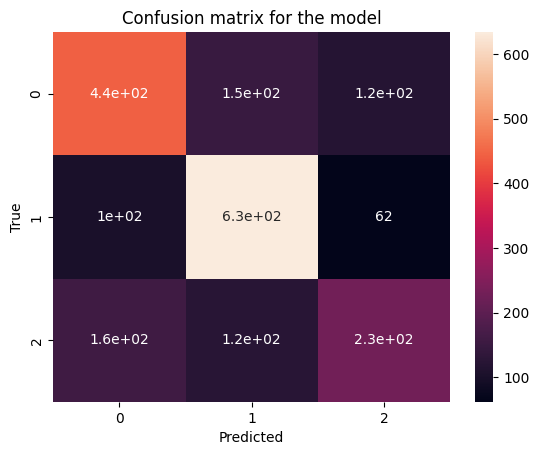

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
#%pip install seaborn
import seaborn as sns
#import matplotlib.plot as plt

test_pred = list(y_all.to('cpu'))
test_true = list(t.reshape(-1).to('cpu'))
cm = confusion_matrix(y_true = test_true, y_pred = test_pred)
cm_heatmap = sns.heatmap(cm, annot = True)
cm_heatmap.set(xlabel = "Predicted", ylabel = "True", title = "Confusion matrix for the model")
# plt.show()
     

In [89]:
print(classification_report(y_true = test_true, y_pred = test_pred, target_names = ['Negative', 'Positive', 'Neutral']))

              precision    recall  f1-score   support

    Negative       0.63      0.62      0.63       709
    Positive       0.70      0.80      0.75       797
     Neutral       0.56      0.45      0.50       510

    accuracy                           0.65      2016
   macro avg       0.63      0.62      0.62      2016
weighted avg       0.64      0.65      0.64      2016

